In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os

data_path = os.path.join("Dataset","Algerian_forest_fires_cleaned_dataset.csv")

data = pd.read_csv(r"D:\Pregrad_Course\Aman_Algerian_Forest_Fire\Dataset\Algerian_forest_fires_dataset_CLEANED.csv")
data.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [4]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [5]:
data['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [6]:

data['day'] = data['day'].replace(0,data['day'].mean())
data['month'] = data['month'].replace(0,data['month'].mean())
data['Temperature'] = data['Temperature'].replace(0,data['Temperature'].mean())
data['RH'] = data['RH'].replace(0,data['RH'].mean())
data['Ws'] = data['Ws'].replace(0,data['Ws'].mean())
data['Rain'] = data['Rain'].replace(0,data['Rain'].mean())
data['FFMC'] = data['FFMC'].replace(0,data['FFMC'].mean())
data['DMC'] = data['DMC'].replace(0,data['DMC'].mean())
data['DC'] = data['DC'].replace(0,data['DC'].mean())
data['FWI'] = data['FWI'].replace(0,data['FWI'].mean())
data['ISI'] = data['ISI'].replace(0,data['ISI'].mean())
data['BUI'] = data['BUI'].replace(0,data['BUI'].mean())
data['FWI'] = data['FWI'].replace(0,data['FWI'].mean())
data['Region'] = data['Region'].replace(0,data['Region'].mean())


In [7]:
import os
file_path = r"D:\\Pregrad_Course\\Aman_Algerian_Forest_Fire\\Dataset\\Algerian_forest_fires_dataset_CLEANED.csv"
if os.path.exists(file_path):
    data = pd.read_csv(file_path)
else:
    print("File not found!")


<Axes: >

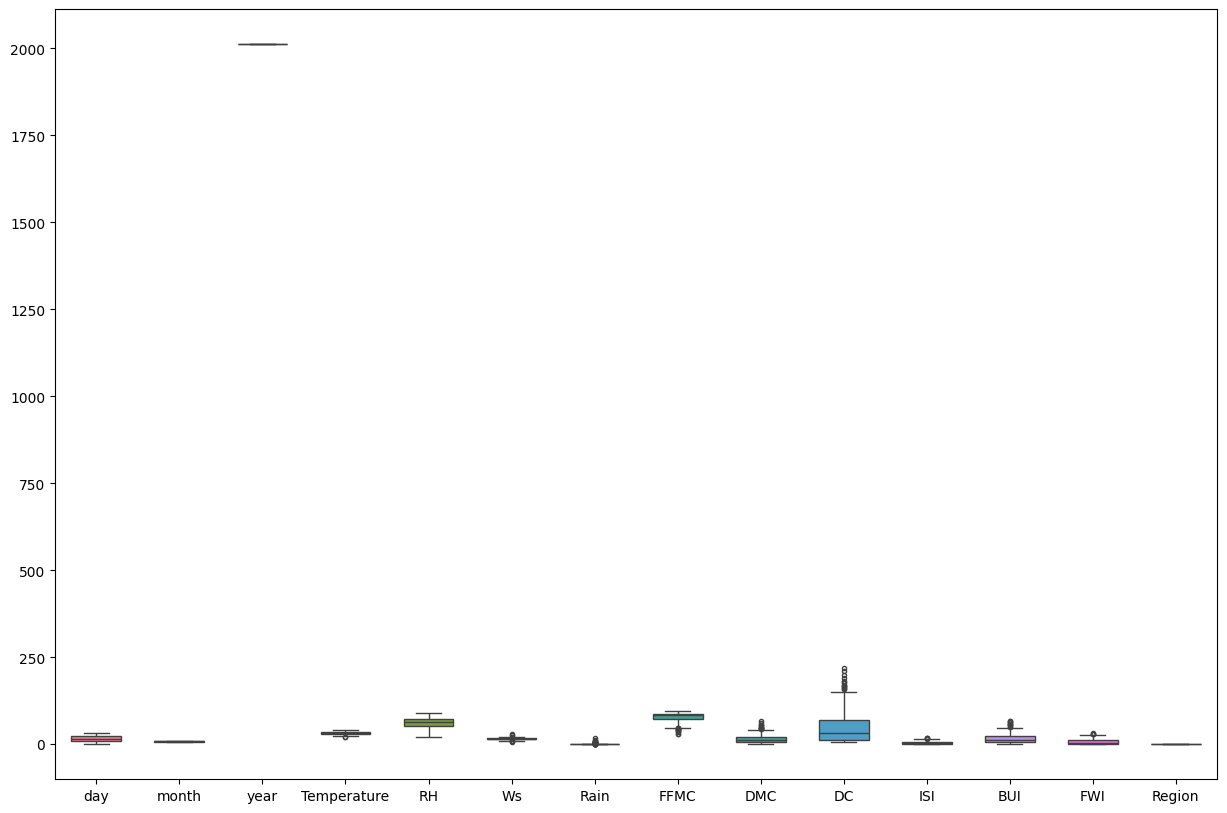

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.6,ax=ax, fliersize=3)


In [9]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [10]:
print(data.dtypes)

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
dtype: object


In [11]:
print(data.columns)


Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')


In [12]:
data = data.rename(columns=lambda x: x.strip())  # Remove extra spaces in column names
print(data.columns)  # Check again


Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')


In [13]:
non_numeric_columns = data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['Classes'], dtype='object')


In [14]:
# Find columns with object (string) data types
non_numeric_columns = data.select_dtypes(include=['object']).columns
print("Non-numeric columns:\n", non_numeric_columns)


Non-numeric columns:
 Index(['Classes'], dtype='object')


In [15]:
print(data['Classes'].unique())

['not fire   ' 'fire   ' 'fire' 'fire ' 'not fire' 'not fire '
 'not fire     ' 'not fire    ']


In [16]:
data.dropna(inplace=True)


In [17]:
data['Classes'] = data['Classes'].str.strip()  # Remove extra spaces
data['Classes'] = data['Classes'].replace({'not fire': 0, 'fire': 1})  # Convert categories to numbers

C:\Users\Aman\AppData\Local\Temp\ipykernel_13992\3652165050.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Classes'] = data['Classes'].replace({'not fire': 0, 'fire': 1})  # Convert categories to numbers


In [18]:
for col in non_numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert errors to NaN

data.fillna(0, inplace=True)  # Replace NaNs with 0


In [19]:
data.dropna(inplace=True)
x = data.drop(columns=['Classes'])
y = data['Classes']


In [20]:
x

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


In [21]:
y

0      0
1      0
2      0
3      0
4      0
      ..
238    1
239    0
240    0
241    0
242    0
Name: Classes, Length: 243, dtype: int64

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)
x_train.shape, x_test.shape


((182, 14), (61, 14))

In [23]:
print(x_train.dtypes)

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Region           int64
dtype: object


In [24]:

x_test.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Region           int64
dtype: object

In [25]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle

In [26]:

# Drop or encode non-numeric columns (handle string data)
x_train = x_train.select_dtypes(include=['number']) 
x_test = x_test.select_dtypes(include=['number']) 


In [27]:

import pickle
from pathlib import Path
##standard Scaling- Standardization
def scaler_standard(x_train, x_test):
    #scaling the data
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    #saving the model
    # model_path = os.path.join('Model','standardScalar.pkl')
    file = open(r'D:\Pregrad_Course\Aman_Algerian_Forest_Fire\Model\standardScaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    
    return x_train_scaled, x_test_scaled


In [28]:
x_train_scaled, x_test_scaled = scaler_standard(x_train, x_test)

In [29]:
x_train_scaled

array([[ 0.19763619,  1.34865164,  0.        , ...,  0.7278858 ,
         1.0048957 ,  1.02222494],
       [-1.13870263,  1.34865164,  0.        , ..., -0.93868129,
        -0.91743998,  1.02222494],
       [-1.47278733,  0.44624503,  0.        , ..., -0.03455178,
         1.53033412,  1.02222494],
       ...,
       [ 1.08852874,  1.34865164,  0.        , ..., -0.75650594,
        -0.75083756, -0.97825827],
       [ 0.19763619, -0.45616158,  0.        , ..., -0.21672713,
        -0.199768  , -0.97825827],
       [ 0.64308246, -0.45616158,  0.        , ...,  1.79394897,
         2.28645282,  1.02222494]], shape=(182, 14))

In [30]:
x_test_scaled 

array([[ 3.08997758e-01,  1.34865164e+00,  0.00000000e+00,
        -8.63371954e-01, -2.72921871e-01, -5.40249712e-01,
        -3.63882055e-01,  7.69875468e-01, -2.11276144e-01,
        -2.10381315e-01,  6.24865799e-01, -2.16727126e-01,
         2.74408137e-01, -9.78258272e-01],
       [ 1.42261344e+00, -1.35856820e+00,  0.00000000e+00,
         1.28179795e+00, -1.64362804e+00, -8.88921512e-01,
        -9.04070350e-02,  5.52497959e-01,  2.11362151e-01,
        -3.04207885e-01, -5.57181353e-02,  2.61733410e-02,
        -4.59811428e-02,  1.02222494e+00],
       [-9.15979493e-01, -4.56161584e-01,  0.00000000e+00,
         2.09212999e-01,  4.45067072e-01,  1.20310929e+00,
        -3.63882055e-01,  5.10424892e-01, -2.11276144e-01,
        -3.70061316e-02,  2.16515438e-01, -1.35760304e-01,
         5.65434268e-02, -9.78258272e-01],
       [-1.36448515e-01,  4.46245028e-01,  0.00000000e+00,
         1.01365171e+00, -4.03465315e-01, -8.88921512e-01,
        -2.27144545e-01,  2.86035205e-01,  3.

In [31]:

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('logreg', LogisticRegression())
])

In [32]:
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()


In [33]:
log_reg = LogisticRegression()

log_reg.fit(x_train_scaled, y_train)

LogisticRegression()

In [34]:
from sklearn.model_selection import GridSearchCV
import numpy as ny 
import warnings
warnings.filterwarnings('ignore')
# parameter grid
parameters = {
    'penalty' : ['l1', 'l2'],
    'C'       : ny.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
    }



In [35]:


logreg = LogisticRegression()
clf = GridSearchCV(logreg,                  #model
                   param_grid = parameters, #hyperparameter
                   scoring='accuracy',      #metric for scoring
                   cv=12)                   #number of folds

clf.fit(x_train_scaled,y_train)


GridSearchCV(cv=12, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [36]:

clf = RandomForestClassifier(n_estimators=100, random_state=40)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


In [37]:
clf.estimator_params


('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'random_state',
 'ccp_alpha',
 'monotonic_cst')

In [38]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat



array([[26,  0],
       [ 3, 32]])

In [39]:

true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [40]:
Accuracy = (true_positive + true_negative) / (true_positive + false_positive + true_negative + false_negative)
Accuracy

np.float64(0.9508196721311475)

In [41]:
Precision = true_positive/(true_positive+false_positive)
Precision

np.float64(1.0)

In [42]:

Recall = true_positive/(true_positive+false_negative)
Recall


np.float64(0.896551724137931)

In [43]:

F1_score = 2*(Recall * Precision) / (Recall + Precision)
F1_score


np.float64(0.9454545454545454)

In [44]:
import pickle
file = open(r'D:\Pregrad_Course\Aman_Algerian_Forest_Fire\Model\modelforPrecisions.pkl','wb')
pickle.dump(log_reg,file)
file.close()